<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Recomendando el Blog de  Hernán Casciari 


[Hernán Casciari](https://hernancasciari.com/#bio), es un escritor argentino, que escribe blog posts con cuentos e historias  relacionadas con el futbol, su vida, infancia, y relaciones familiares con toques de ficción. Este [blog](https://hernancasciari.com/blog/) es  tan interesantes que en 2005 fue premiado como “El mejor blog del mundo” por Deutsche Welle de Alemania. 

El objetivo de este caso-taller es construir un sistema de recomendación basado en los contenidos de los posts utilizando similitud de las palabras usadas o temas de los cuentos.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero."

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos  en la misma ruta de acceso del cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

En la carpeta `data` se encuentran el archivo `blog_casciari.csv` con el título, la fecha de publicación, y el contenido de los cuentos publicados en el blog  de sr. Casciari. Cargue estos datos en su *cuaderno* y reporte brevemente el contenido de la base.
   

In [1]:
import pandas as pd

# Ruta del archivo CSV
csv_file_path = 'data/blog_casciari.csv'

# Cargar el archivo CSV en un DataFrame
blog_casciari_df = pd.read_csv(csv_file_path)

# Mostrar las primeras filas del DataFrame para revisar el contenido
print(blog_casciari_df.head())

                       titulo    fecha  \
0            El rincón blanco  1/11/08   
1  Mínimos avances en la cama  1/24/08   
2                  Don Marcos  2/19/08   
3              Los dos rulfos  3/26/08   
4   La noticia no es el perro  4/15/08   

                                              cuento  
0  De pronto yo estaba en el hogar donde pasé la ...  
1  Menos la cama, todo ha mejorado en este mundo....  
2  Dos veces, y no una, mi abuelo materno me ayud...  
3  A su regreso de México, mi amigo Comequechu no...  
4  De repente, un video de You Tube recibe un mil...  


In [2]:
# Número de filas y columnas
print(f"Número de filas: {blog_casciari_df.shape[0]}")
print(f"Número de columnas: {blog_casciari_df.shape[1]}")

# Tipos de datos de las columnas
print("\nTipos de datos:")
print(blog_casciari_df.dtypes)

# Verificar si hay valores nulos
print("\nValores nulos por columna:")
print(blog_casciari_df.isnull().sum())

# Estadísticas sobre la longitud de los títulos y los cuentos
blog_casciari_df['longitud_titulo'] = blog_casciari_df['titulo'].apply(len)
blog_casciari_df['longitud_cuento'] = blog_casciari_df['cuento'].apply(len)

print("\nEstadísticas básicas sobre la longitud de los títulos y cuentos:")
print(blog_casciari_df[['longitud_titulo', 'longitud_cuento']].describe())


Número de filas: 520
Número de columnas: 3

Tipos de datos:
titulo    object
fecha     object
cuento    object
dtype: object

Valores nulos por columna:
titulo    0
fecha     0
cuento    0
dtype: int64

Estadísticas básicas sobre la longitud de los títulos y cuentos:
       longitud_titulo  longitud_cuento
count       520.000000       520.000000
mean         24.951923      4956.582692
std           9.291449      3502.399826
min           3.000000       491.000000
25%          19.000000      2967.000000
50%          25.000000      3852.500000
75%          32.000000      6334.250000
max          51.000000     30381.000000


El análisis muestra lo siguiente:

- Número de filas y columnas: La base de datos contiene 520 cuentos, con 3 columnas (título, fecha, cuento).
- Tipos de datos: Todas las columnas están en formato de texto (object), incluyendo la fecha, lo que indica que podría necesitar una conversión si se requiere manipulación de fechas.
- Valores nulos: No hay valores nulos en ninguna de las columnas, lo que asegura que toda la información está completa.
- Estadísticas de longitud:
 Los títulos tienen una longitud promedio de 25 caracteres, con una variación moderada (mínimo de 3 y máximo de 51).
 Los cuentos tienen una longitud promedio de aproximadamente 4,957 caracteres, con una gran variación (desde 491 hasta 30,381 caracteres). Esto sugiere que algunos cuentos son mucho más largos que otros.

### 2. Homogenización de textos

Para cumplir con el objetivo de generar recomendaciones en esta sección debe preparar los posts para poder ser utilizados en su sistema de recomendación. Para ello, "limpie" y "tokenize" cada uno de los cuentos, describiendo detalladamente los pasos que realizo y si transformó o eliminó ciertas palabras. Para asistirlo en la tarea he creado listas de *stopwords* que están disponibles en la carpeta `data`. En su procedimiento ilustre la limpieza con el cuento 'La venganza del metegol'. (En su limpieza recuerde que el objetivo es generar recomendaciones a partir de la similitud de las palabras o temas de los cuentos)

In [3]:
import spacy
import re
import pandas as pd

# Cargar la lista de stopwords adicionales desde el archivo
extra_stopwords_path = 'data/extra_stopwords.csv'
extra_stopwords = pd.read_csv(extra_stopwords_path, header=None)
extra_stopwords = set(extra_stopwords[0].to_list())

# Cargar el modelo de español de SpaCy
nlp = spacy.load("es_core_news_sm")

# Seleccionar el cuento 'La venganza del metegol' para limpieza
cuento = blog_casciari_df.loc[blog_casciari_df['titulo'] == 'La venganza del metegol', 'cuento'].values[0]

# 1. Limpieza de texto: eliminar números, espacios extra y caracteres no deseados
cuento = re.sub(r'\d+', '', cuento)
cuento = re.sub(r'\s+', ' ', cuento).strip()

# 2. Convertir a minúsculas
cuento = cuento.lower()

# 3. Tokenización y lematización con SpaCy
doc = nlp(cuento)
tokens = [token.lemma_ for token in doc if not token.is_stop and token.text not in extra_stopwords]

# 4. Eliminar palabras muy cortas y volver a formar el texto limpio
cleaned_text = " ".join([token for token in tokens if len(token) > 2])

# Mostrar una parte del texto limpio
print(cleaned_text[:500])

mes invitar presentar libro aires libro fútbol char él director editorial invitar jugar partido metegol invento español creador llamar erróneamente futbolín hacer año jugar metegol suerte tocar compañero filósofo prestigioso poder ganar contrincante autor libro director editorial conocer juventud jugar partido entero destrozar facilidad pasmós hacer año practicar falso deporte muñeca reflejo descubrí perder maña sentir edad destreza mantengar indemne pelotuda convertir noticia char él fotógrafo 


El procedimiento que aplicamos aquí sigue las mismas técnicas de limpieza, tokenización, lematización y eliminación de stopwords que vimos en los laboratorios teóricos:

- Limpieza de texto: Se utiliza la eliminación de números y caracteres no alfanuméricos mediante expresiones regulares.

- Conversion a minusculas: Se utilizó la conversión a minúsculas para estandarizar el texto, tal como se implementó aquí para evitar diferencias entre palabras por el uso de mayúsculas.

- Tokenizacion y Lematizacion: Se utilizo SpaCy para la tokenización y la lematización, donde se dividió el texto en palabras o tokens y luego se transformaron a sus formas base (lemas)

- Eiminación de stopwords: Se amplio la lista de stopwords y se elimino palabras irrelevantes. Este proceso es fundamental para reducir el ruido en el análisis de texto.

- Eliminacion de palarbas cortas: Como último paso, se eliminaron palabras con menos de tres caracteres, dado que suelen ser poco relevantes en términos de significado para la mayoría de los análisis de texto



### 3. Generando Recomendaciones

En esta sección nos interesa generar recomendaciones de cuentos en el blog a un usuario que leyó 'La venganza del metegol'. Para ello vamos a utilizar distintas estrategias.

#### 3.1. Recomendaciones basadas en contenidos

##### 3.1.1. Genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para el cuento 'La venganza del metegol' usando en la distancia de coseno donde el texto este vectorizado por `CountVectorizer`. Explique el procedimiento que realizó y como ordenó las recomendaciones.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorizar el texto con CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(blog_casciari_df['cuento'])

# Seleccionar el cuento "La venganza del metegol" como referencia
metegol_index = blog_casciari_df[blog_casciari_df['titulo'] == 'La venganza del metegol'].index[0]
metegol_vector = X[metegol_index]

# Calcular la similitud del coseno entre "La venganza del metegol" y los otros cuentos
cosine_similarities = cosine_similarity(metegol_vector, X).flatten()

# Obtener los índices de las 5 recomendaciones más similares
recommended_indices = cosine_similarities.argsort()[-6:-1][::-1]

# Mostrar las 5 recomendaciones
recommended_cuentos = blog_casciari_df.iloc[recommended_indices][['titulo', 'fecha']]
print(recommended_cuentos)

                                        titulo    fecha
17               Cuento con bruja y tramontina  8/29/08
483                              Primer asalto  3/27/07
353                      Lado A: música ligera  8/24/04
414  La desgracia venía en sobres papel madera  4/27/06
146                          Electrodomésticos  4/24/15


En esta sección se utilizó CountVectorizer para generar recomendaciones basadas en la similitud de los cuentos usando la distancia de coseno. El procedimiento fue el siguiente:

Vectorización: Primero, se usó CountVectorizer para convertir el contenido de los cuentos en una matriz de frecuencia de palabras, en la que cada fila representa un cuento y cada columna representa una palabra. El valor de cada celda indica cuántas veces aparece la palabra en el cuento.

Similitud de coseno: Luego, se calculó la similitud de coseno entre el cuento "La venganza del metegol" y los demás cuentos. La similitud de coseno mide la semejanza entre dos vectores en función del ángulo entre ellos, lo que nos permite encontrar cuentos que comparten patrones similares de palabras.

Selección de recomendaciones: Después de calcular las similitudes, se seleccionaron las 5 recomendaciones más cercanas al cuento original, ordenándolas en función de su similitud, de mayor a menor.

Como resultado, los cuentos más similares a "La venganza del metegol" usando CountVectorizer fueron:

"Cuento con bruja y tramontina".
"Primer asalto".
"Lado A: música ligera".
"La desgracia venía en sobres papel madera".
"Electrodomésticos".

Análisis: CountVectorizer asigna igual peso a todas las palabras, independientemente de su frecuencia en el corpus. Esto puede llevar a que palabras muy comunes entre cuentos influyan más en la similitud, lo que puede afectar la diversidad de las recomendaciones.

##### 3.1.2. Genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para  el cuento 'La venganza del metegol' usando nuevamente la distancia de coseno, pero ahora vectorice el texto usando `TF-IDFVectorizer`. Explique el procedimiento que realizó y como ordenó las recomendaciones. Compare con los resultados del punto anterior y explique sus similitudes y/o diferencias.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizar el texto con TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(blog_casciari_df['cuento'])

# Calcular la similitud del coseno entre "La venganza del metegol" y los otros cuentos
metegol_vector_tfidf = X_tfidf[metegol_index]
cosine_similarities_tfidf = cosine_similarity(metegol_vector_tfidf, X_tfidf).flatten()

# Obtener los índices de las 5 recomendaciones más similares
recommended_indices_tfidf = cosine_similarities_tfidf.argsort()[-6:-1][::-1]

# Mostrar las 5 recomendaciones
recommended_cuentos_tfidf = blog_casciari_df.iloc[recommended_indices_tfidf][['titulo', 'fecha']]
print(recommended_cuentos_tfidf)


                                        titulo     fecha
17               Cuento con bruja y tramontina   8/29/08
121                              Gaussian blur  10/10/13
14                Dice el Chiri, dice el Gordo   7/16/08
414  La desgracia venía en sobres papel madera   4/27/06
107               Matar la crisis a volantazos   9/23/10


En esta sección se utilizó TF-IDFVectorizer para mejorar el cálculo de similitud, también utilizando la distancia de coseno, pero asignando diferente peso a las palabras según su frecuencia en el corpus. El procedimiento fue el siguiente:

Vectorización con TF-IDF: TF-IDFVectorizer convierte el contenido de los cuentos en una matriz donde cada celda contiene el valor TF-IDF de una palabra, que refleja su importancia en el cuento y en el corpus en general. Las palabras que aparecen frecuentemente en muchos cuentos tienen menos peso, mientras que las que son específicas a un cuento tienen más peso.

Similitud de coseno: Al igual que en el método anterior, se calculó la similitud de coseno entre "La venganza del metegol" y los demás cuentos, pero esta vez usando los vectores ponderados por TF-IDF.

Selección de recomendaciones: Se seleccionaron las 5 recomendaciones más cercanas, ordenadas por similitud de mayor a menor.

Las recomendaciones generadas con TF-IDFVectorizer fueron:

"Cuento con bruja y tramontina"
"Gaussian blur"
"Dice el Chiri, dice el Gordo"
"La desgracia venía en sobres papel madera"
"Matar la crisis a volantazos"

Análisis: En comparación con CountVectorizer, TF-IDF reduce el peso de las palabras que aparecen en muchos cuentos, lo que da lugar a recomendaciones más diversas y menos influenciadas por palabras muy comunes. Observamos que cuentos como "Gaussian blur" y "Matar la crisis a volantazos" emergen en esta lista, lo que sugiere que las palabras clave poco frecuentes jugaron un papel importante en estas recomendaciones.

##### 3.1.3. Genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para el cuento 'La venganza del metegol' usando el texto vectorizado por `TF-IDFVectorizer` y la correlación como medida de similitud. Explique el procedimiento que realizó y como ordenó las recomendaciones. Compare con los resultados de los puntos anteriores y explique sus similitudes y/o diferencias.

In [6]:
import numpy as np

# Calcular la correlación de Pearson entre "La venganza del metegol" y los otros cuentos
correlation_pearson = np.corrcoef(X_tfidf.toarray())

# Obtener las 5 recomendaciones más similares (excepto el propio cuento de referencia)
pearson_similarities = correlation_pearson[metegol_index]
recommended_indices_pearson = pearson_similarities.argsort()[-6:-1][::-1]

# Mostrar las 5 recomendaciones
recommended_cuentos_pearson = blog_casciari_df.iloc[recommended_indices_pearson][['titulo', 'fecha']]
print(recommended_cuentos_pearson)


                                        titulo     fecha
17               Cuento con bruja y tramontina   8/29/08
121                              Gaussian blur  10/10/13
14                Dice el Chiri, dice el Gordo   7/16/08
414  La desgracia venía en sobres papel madera   4/27/06
107               Matar la crisis a volantazos   9/23/10


Aquí se utilizó nuevamente TF-IDFVectorizer, pero en lugar de la similitud de coseno, se usó la correlación de Pearson como medida de similitud. El procedimiento fue el siguiente:

Vectorización con TF-IDF: Se usó la misma matriz TF-IDF generada anteriormente, donde las palabras están ponderadas por su relevancia en cada cuento.

Correlación de Pearson: La correlación de Pearson mide la relación lineal entre los vectores de dos cuentos, capturando cómo varía la frecuencia de las palabras en cada uno. En este caso, observamos cómo la presencia de palabras similares está correlacionada entre cuentos.

Selección de recomendaciones: Se seleccionaron las 5 recomendaciones más cercanas al cuento original en función de su correlación.

Las recomendaciones basadas en la correlación de Pearson fueron:

"Cuento con bruja y tramontina"
"Gaussian blur"
"Dice el Chiri, dice el Gordo"
"La desgracia venía en sobres papel madera"
"Matar la crisis a volantazos"

Análisis: En este caso, las recomendaciones son casi idénticas a las generadas con TF-IDFVectorizer y la distancia de coseno. Sin embargo, la correlación de Pearson tiende a capturar la similitud entre cuentos que tienen una variación similar en la frecuencia de sus palabras clave, lo que puede ser útil para encontrar cuentos que siguen patrones narrativos similares pero no necesariamente usan las mismas palabras con la misma intensidad.

##### 3.2. Recomendaciones basadas en temas

Usando modelado de temas con LDA, encuentre los temas subyacentes en el blog. Explique como eligió el numero óptimo de temas. Utilizando el tema asignado al cuento 'La venganza del metegol' y la probabilidad de pertenecer a este tema genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para este cuento. Explique el procedimiento que realizó. Compare con los resultados encontrados anteriormente y explique sus similitudes y/o diferencias. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


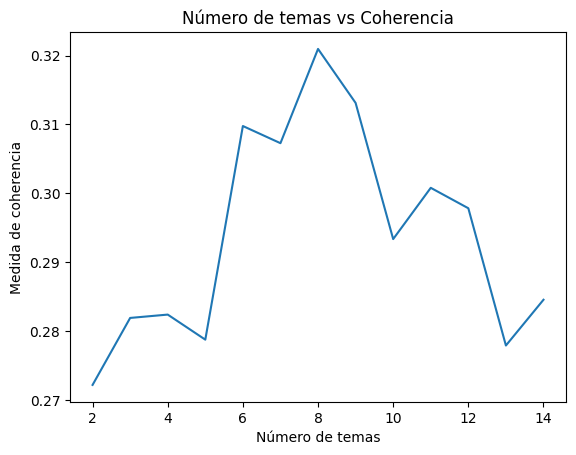

In [9]:
from gensim.models import CoherenceModel
from gensim.models.ldamulticore import LdaMulticore

# Definir una función para calcular la coherencia
def calcular_coherencia(dictionary, corpus, texts, start=2, limit=10, step=1):
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        # Entrenar el modelo LDA con el número de temas
        model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=123, passes=20)
        model_list.append(model)
        
        # Calcular la coherencia del modelo
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    
    return model_list, coherence_values

# Ejecutar el cálculo de coherencia para un rango de temas
modelos, valores_coherencia = calcular_coherencia(dictionary=dictionary, corpus=corpus, texts=blog_casciari_df['tokens'], start=2, limit=15, step=1)

# Graficar los resultados
import matplotlib.pyplot as plt

x = range(2, 15, 1)
plt.plot(x, valores_coherencia)
plt.xlabel("Número de temas")
plt.ylabel("Medida de coherencia")
plt.title("Número de temas vs Coherencia")
plt.show()

In [13]:
import pyLDAvis
import pyLDAvis.gensim_models
# Entrenar el modelo LDA con el número óptimo de temas
num_optimo_temas = 8  
lda_model_opt = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_optimo_temas, random_state=123, passes=20)

# Visualizar los temas con pyLDAvis
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model_opt, corpus, dictionary)
pyLDAvis.display(lda_visualization)


/opt/conda/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/opt/conda/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


In [14]:
# Seleccionar el cuento "La venganza del metegol"
metegol_index = blog_casciari_df[blog_casciari_df['titulo'] == 'La venganza del metegol'].index[0]

# Obtener la distribución de temas del cuento "La venganza del metegol"
metegol_lda_vector = lda_model_opt.get_document_topics(corpus[metegol_index])

# Seleccionar el tema dominante (el que tiene la mayor probabilidad)
metegol_tema_dominante = max(metegol_lda_vector, key=lambda item: item[1])[0]
print(f"El tema dominante para 'La venganza del metegol' es: {metegol_tema_dominante}")

# Filtrar todos los cuentos que comparten el mismo tema dominante
recomendaciones_indices = []
for idx, doc_topics in enumerate(lda_model_opt[corpus]):
    for topic_id, prob in doc_topics:
        if topic_id == metegol_tema_dominante:
            recomendaciones_indices.append((idx, prob))

# Ordenar los cuentos por la probabilidad de pertenencia al tema dominante
recomendaciones_indices = sorted(recomendaciones_indices, key=lambda x: x[1], reverse=True)

# Mostrar las 5 recomendaciones más cercanas (excluyendo el cuento original)
recomendaciones_indices = [idx for idx, prob in recomendaciones_indices if idx != metegol_index][:5]
recomendaciones = blog_casciari_df.iloc[recomendaciones_indices][['titulo', 'fecha']]

print("\nRecomendaciones basadas en temas para 'La venganza del metegol':")
print(recomendaciones)


El tema dominante para 'La venganza del metegol' es: 0

Recomendaciones basadas en temas para 'La venganza del metegol':
                         titulo    fecha
111                     Basdala   7/8/11
58                  La revancha  6/19/09
371  Un Detalle Sin Importancia  12/6/04
2                    Don Marcos  2/19/08
140  La estrategia del banderín  8/14/14


Para este ejercico se realizo lo siguiente:

- Se construyó un diccionario de palabras y un corpus. LDA necesita estos dos insumos para poder procesar los textos y encontrar los temas subyacentes. El corpus y el diccionario le permiten al modelo entender qué palabras están presentes en qué documentos.

- Se entrenó el modelo LDA con diferentes números de temas (de 2 a 14 temas) para ver cuál era el número óptimo. Utilizando la coherencia como métrica, se pudo identificar que 8 temas era el número más adecuado para el corpus.

- Se utilizó la herramienta pyLDAvis para visualizar los temas de manera interactiva. La visualización mostró:

A. Burbujas que representan los diferentes temas, donde cada burbuja muestra cuán frecuentemente aparece el tema en el corpus y cuán diferente es de otros temas.

B. Palabras clave asociadas a cada tema, lo que te permitió identificar qué palabras son representativas de cada tema.

- Se utilizo el modelo LDA entrenado previamente para obtener la distribución de temas del cuento "La venganza del metegol". Para obtener el tema dominante, se selecciono el tema con la mayor probabilidad de todos los temas posibles para este cuento. En este caso, el Tema 0 es el que tiene la probabilidad más alta Después de identificar el tema dominante (Tema 0) para "La venganza del metegol", se busco otros cuentos que también estén altamente asociados con este mismo tema. Se reocrrio todos los cuentos, y para cada uno se reviso cuál es su distribución de temas (lo mismo que se hizo para "La venganza del metegol"). Luego, se selecciono aquellos cuentos que también tienen al Tema 0 como dominante o como un tema relevante y para refinar el resultado, se ordenaron los cuentos según la probabilidad de pertenencia al tema (es decir, cuanto más fuerte es la relación entre el cuento y el Tema ma 0, más arriba estará en la lista).

- Las recomendaciones obtenidas son los siguientes cuentos:

"Basdala" (7/8/11)
"La revancha" (6/19/09)
"Un Detalle Sin Importancia" (12/6/04)
"Don Marcos" (2/19/08)
"La estrategia del banderín" (8/14/14)

Comparado con métodos basados en similitud de coseno o correlación, este enfoque captura mejor la esencia narrativa y temática de los cuentos, proporcionando recomendaciones más profundas y coherentes en términos de contenido.



### 4 Recomendaciones generales

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para la entrada elegida? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

En mi opinión, el procedimiento que generó las mejores recomendaciones fue el análisis de temas mediante LDA. Esto se debe a que este enfoque permite capturar las relaciones temáticas subyacentes entre los cuentos, más allá de la simple coincidencia de palabras. A diferencia de otros métodos, como TF-IDF o CountVectorizer, que se enfocan en la frecuencia y el peso de las palabras, el análisis de temas permite entender el contexto y los conceptos comunes en los textos, agrupando cuentos que tratan sobre temas similares.

Al utilizar LDA, se logra identificar los temas principales que dominan el contenido de los cuentos, lo que facilita generar recomendaciones con un enfoque más apropiado. Este método no se limita a las palabras en superficie, sino que descubre los patrones y tópicos de mayor relevancia en el contenido, lo que garantiza recomendaciones más alineadas con los intereses temáticos del lector. En el caso de "La venganza del metegol", el tema dominante fue el Tema 0, lo que permitió encontrar cuentos como "Basdala" y "La revancha", que tratan sobre temas relacionados, resultando en recomendaciones coherentes y temáticamente ricas.

Evaluación objetiva de las recomendaciones
Para implementar una evaluación objetiva de las recomendaciones generadas, se pueden utilizar las siguientes estrategias:

1. Comparación cuantitativa de precisión y pertinencia:

Se podría realizar una comparación directa entre los diferentes métodos de recomendación (LDA, TF-IDF, y CountVectorizer), midiendo la precisión y la pertinencia de las recomendaciones para cada uno de estos métodos. Esto se puede lograr utilizando métricas como la tasa de clics, F1 score, o incluso una comparación de cuántos de los cuentos recomendados son seleccionados por los usuarios como relevantes o satisfactorios.

2. Evaluación subjetiva por parte de los usuarios:

Un sistema en el que los usuarios califiquen las recomendaciones basadas en su relevancia o satisfacción. Este método proporcionaría retroalimentación directa sobre si las recomendaciones generadas fueron útiles, lo que ayudaría a ajustar y mejorar el modelo en función de las preferencias reales de los lectores.
